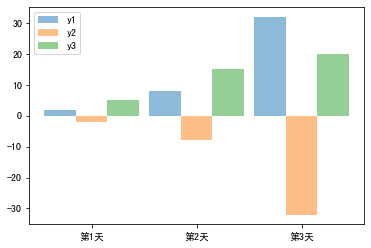

In [1]:
import matplotlib.pyplot as plt
import numpy as np
y = np.random.randint(-100, 100, 10)
x = [i for i in range(3)]
y1 = [2, 8, 32]
y2 = [-2, -8, -32]
y3 = [5, 15, 20]
weith = 0.3
plt.bar(x, y1, width=0.3, label='y1', alpha=0.5)
plt.bar([i + weith for i in x], y2, width=0.3, label='y2', alpha=0.5)
plt.bar([i + 2 * weith for i in x], y3, width=0.3, label='y3', alpha=0.5)
x_x = ['第{}天'.format(i + 1) for i in x]
plt.xticks([i + weith for i in x], x_x)
plt.legend()
plt.show()

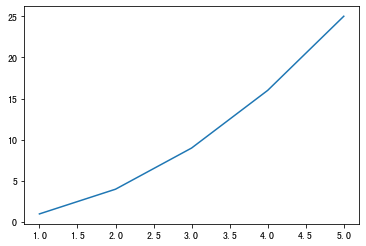

In [1]:
import matplotlib.pyplot as plt
#准备绘制的点
x=[1,2,3,4,5]
y=[1,4,9,16,25]
#调用绘制方法
plt.plot(x,y)
#显示图
plt.show()


In [11]:
import pandas as pd
import numpy as np
import geohash2

df = pd.read_csv("mobike_train_data.csv")
print(df)
df=df.iloc[0:5000,:]
df["J1"] = np.nan
df["W1"] = np.nan
df["J2"] = np.nan
df["W2"] = np.nan
for i in range(df.shape[0]):
    df.iloc[i, 7], df.iloc[i, 8] = geohash2.decode(df.iloc[i][5])
    df.iloc[i, 9], df.iloc[i, 10] = geohash2.decode(df.iloc[i][6])
print(df)

dx = df.groupby(by=[df["J1"], df["W1"], df["J2"], df["W2"]])
di = dx.count()["userid"]
print(di)

orderid   userid  bikeid  biketype            starttime  \
0        1893973   451147  210617         2  2017-05-14 22:16:50   
1        4657992  1061133  465394         1  2017-05-14 22:16:52   
2        2965085   549189  310572         1  2017-05-14 22:16:51   
3        4548579   489720  456688         1  2017-05-14 22:16:51   
4        3936364   467449  403224         1  2017-05-14 22:16:50   
...          ...      ...     ...       ...                  ...   
3214091   308143   683030   42881         1  2017-05-23 06:20:55   
3214092  1886236   394183  209895         2  2017-05-23 06:20:57   
3214093  2162814   878844  235870         2  2017-05-23 06:20:56   
3214094  3702730   104540  380669         1  2017-05-23 06:20:56   
3214095  2878326   466770  302424         2  2017-05-23 06:20:56   

        geohashed_start_loc geohashed_end_loc  
0                   wx4snhx           wx4snhj  
1                   wx4dr59           wx4dquz  
2                   wx4fgur           wx4fu5n  


In [16]:
import folium

c1 = df["J1"]
c2 = df["W1"]
print("----------------------------")
d1 = np.array(c1)
d2 = np.array(c2)
print("----------------------------")

# get the first 200 crimes in the cdata
data =df

# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# Loop through the 200 crimes and add each to the incidents feature group
for lat, lng, in zip(d1, d2):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='red',
            fill_opacity=0.5
        )
    )

# Add incidents to map
san_map = folium.Map(location=[39.93, 116.42], zoom_start=12)
san_map.add_child(incidents)

----------------------------
----------------------------


In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("test3.csv")
df['starttime'] = pd.to_datetime(df.starttime)
df = df.sort_values(by='starttime', ascending=True)
df.index = df['starttime']
df.['2017-05-14 22:24:52' : '2017-05-14 22:40:05']
df

,Unnamed: 0,orderid,userid,bikeid,biketype,starttime,geohashed_start_loc,geohashed_end_loc
starttime,,,,,,,,
2017-05-14 22:24:52,1001,156534,609817,21480,1,2017-05-14 22:24:52,wx4fepw,wx4feq0
2017-05-14 22:24:54,1002,3134304,291936,326428,1,2017-05-14 22:24:54,wx4gc58,wx4gbgu
2017-05-14 22:24:54,1003,3872560,519900,397126,1,2017-05-14 22:24:54,wx4fcr4,wx4fcwj
2017-05-14 22:24:54,1005,3874549,305681,397307,1,2017-05-14 22:24:54,wx4fbjd,wx4dzuu
2017-05-14 22:24:54,1006,144899,788187,19531,1,2017-05-14 22:24:54,wx4fdsk,wx4fdsj
...,...,...,...,...,...,...,...,...
2017-05-14 22:56:09,3997,1459689,755004,169231,2,2017-05-14 22:56:09,wx4fbx2,wx4fbwu
2017-05-14 22:56:09,3998,5156407,900372,508130,1,2017-05-14 22:56:09,wx4g0wk,wx4g0w6
2017-05-14 22:56:10,3999,760843,840757,100821,1,2017-05-14 22:56:10,wx4fz1q,wx4fz1h


In [10]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import geohash2

df = pd.read_csv("mobike_train_data.csv")
df['starttime'] = pd.to_datetime(df.starttime)
df = df.sort_values(by='starttime', ascending=True)
df.index = df['starttime']
df = df['2017-05-15 06:00:00':'2017-05-15 06:30:00']
df["J1"] = np.nan
df["W1"] = np.nan
df["J2"] = np.nan
df["W2"] = np.nan
for i in range(df.shape[0]):
    df.iloc[i, 7], df.iloc[i, 8] = geohash2.decode(df.iloc[i][5])
    df.iloc[i, 9], df.iloc[i, 10] = geohash2.decode(df.iloc[i][6])

dx = df.groupby(by=[df["J1"], df["W1"]])
di = dx.count()["userid"]
di = di.sort_values()
# print(di)
lis = []
j_min = di.min()
j_max = di.max()
j_a=(j_min+j_max)/2
for i, j in zip(di.index, di.values):
    if j>j_a:
        lis.append([float(i[0]), float(i[1]), (j-j_a)/(j_max-j_a)])
    else:
        lis.append([float(i[0]), float(i[1]),0])
#x1 = np.array(di)
# print(x1)

# HeatMap
m = folium.Map([39.93, 116.38],radius=5,tiles='stamentoner', zoom_start=14)
HeatMap(lis).add_to(m)
# m.save(os.path.join('results', 'Heatmap.html'))
m

FileNotFoundError: [Errno 2] File mobike_train_data.csv does not exist: 'mobike_train_data.csv'